# Task - 3: Customer Segmentation / Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv("/content/Customers.csv")
transaction = pd.read_csv("/content/Transactions.csv")

## Merge datasets

In [3]:
data = pd.merge(customer, transaction, on='CustomerID')

## Feature Engineering

In [8]:
total_spending = data.groupby('CustomerID')['TotalValue'].sum().reset_index(name = 'TotalSpend')
average_spending = data.groupby('CustomerID')['TotalValue'].mean().reset_index(name = 'AverageSpend')
trans_cnt = data.groupby('CustomerID')['TransactionID'].count().reset_index(name = 'TransactionCount')

In [9]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])
customer['Days'] = (pd.Timestamp.now() - customer['SignupDate']).dt.days

In [10]:
#merging features

In [12]:
customer_features = customer[['CustomerID','Region','Days']].merge(total_spending, on='CustomerID').merge(average_spending, on='CustomerID').merge(trans_cnt, on='CustomerID')

In [13]:
#encoding categorical variables

In [14]:
encoder = OneHotEncoder(sparse_output=False)
encoded_region = pd.DataFrame(encoder.fit_transform(customer_features[['Region']]), columns=encoder.get_feature_names_out(['Region']))

In [15]:
customer_features = pd.concat([customer_features,encoded_region],axis=1).drop(columns=['Region'])

In [16]:
#normalization

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

## Clustering

In [18]:
kmeans_clustering = KMeans(n_clusters=5, random_state=42)
model = kmeans_clustering.fit_predict(scaled_features)

In [19]:
customer_features['Cluster'] = model

In [20]:
dbInd = davies_bouldin_score(scaled_features, model)
print("Davies-Bouldin Index:", dbInd)

Davies-Bouldin Index: 1.1407832979783172


In [21]:
#PCA usage for dimensionality reduction

In [22]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = reduced_features[:, 0]
customer_features['PCA2'] = reduced_features[:, 1]

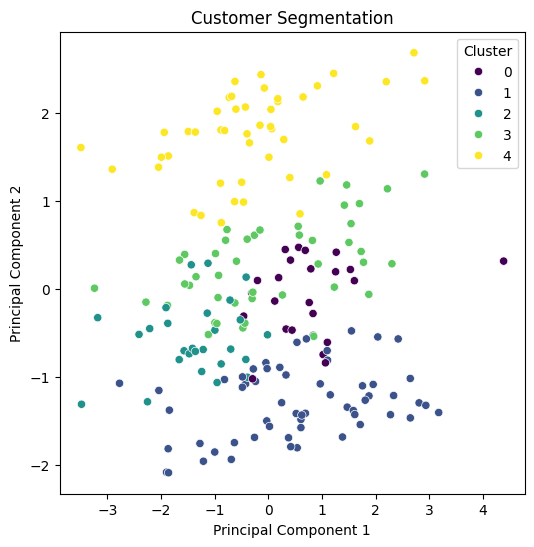

In [23]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [24]:
customer_features.to_csv('customer_features.csv',index=False)